# HW2 - Plotting with `matplotlib`

**Spring 2020 | Python for Neuroscientists**


This HW will focus on plotting with the `matplotlib` library. We will use the coronavirus data, which can be downloaded as a csv file from the following Johns Hopkins University website. The data is updated daily here:

https://data.humdata.org/dataset/novel-coronavirus-2019-ncov-cases

This data is simply cumulative confirmed cases for each country.

In [1]:
# pandas 
import pandas as pd

# matplotlib
import matplotlib.pyplot as plt

# seaborn
import seaborn as sns



## Load the csv file

Make sure that the csv file and the .ipynb are in the same directory

In [2]:
df = pd.read_csv('time_series_covid19_confirmed_global.csv') # this is pandas function

This loads a table, or pandas "dataframe." We will use pandas to extract data from the table. We can look at the contents of the table:

In [3]:
df

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20
0,NaN,Afghanistan,33.000000,65.000000,0,0,0,0,0,0,...,110,110,120,170,174,237,273,281,299,349
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,186,197,212,223,243,259,277,304,333,361
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,409,454,511,584,716,847,986,1171,1251,1320
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,267,308,334,370,376,390,428,439,466,501
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,4,5,7,7,7,8,8,8,10,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257,NaN,Malawi,-13.254308,34.301525,0,0,0,0,0,0,...,0,0,0,0,0,0,3,3,4,4
258,Falkland Islands (Islas Malvinas),United Kingdom,-51.796300,-59.523600,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,2
259,Saint Pierre and Miquelon,France,46.885200,-56.315900,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
260,NaN,South Sudan,6.877000,31.307000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


Let's look at the stats for Italy

In [4]:
df_italy = df[df['Country/Region'] == 'Italy'] # this is one way to select Italy from the dataframe
df_italy.head() # this displays the 

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20
137,NaN,Italy,43.0,12.0,0,0,0,0,0,0,...,86498,92472,97689,101739,105792,110574,115242,119827,124632,128948


In [5]:
df_italy1 = df_italy.set_index('Country/Region', drop = True) # set pandas dataframe index to country
df_italy2 = df_italy1.drop(columns=['Lat','Long','Province/State'])

data_italy = df_italy2.loc['Italy','2/20/20':'4/5/20'] # select dates through April 5, 2020

Note that it would be cleaner to write the following:
> `df_italy = df_italy.set_index('Country/Region', drop = True)`

> `df_italy = df_italy.drop(columns=['Lat','Long','Province/State'])`

> `data_italy = df_italy.loc['Italy','2/20/20':'4/5/20']`

# Part 1: Plot the Data from Italy

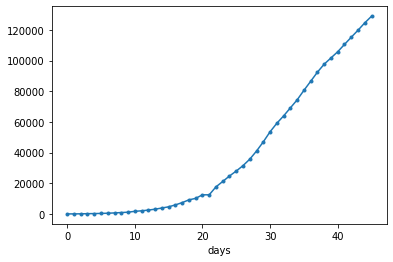

In [6]:
plt.plot(data_italy.values,'.-')
plt.xlabel('days')
plt.show()

## 1a Change the color of the line

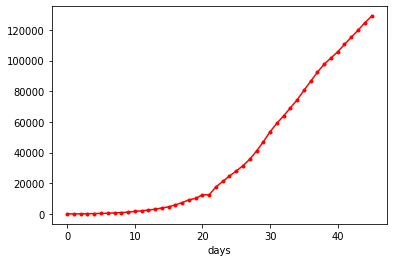

In [7]:
plt.plot(data_italy.values,'.-',color='red')
plt.xlabel('days')
plt.show()

## 1b Change the thickness of the line

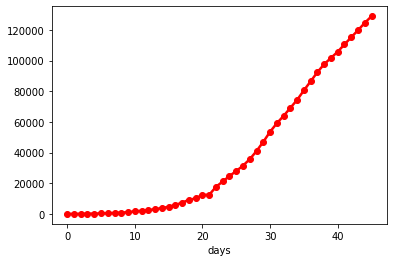

In [8]:
plt.plot(data_italy.values,'o-',color='red',linewidth=2.5)
plt.xlabel('days')
plt.show()

## 1c Add a label the y-axis

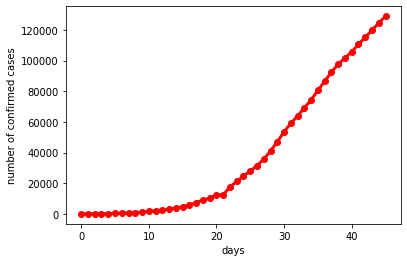

In [9]:
plt.plot(data_italy.values,'o-',color='red', linewidth= 3)
plt.xlabel('days')
plt.ylabel('number of confirmed cases')
plt.show()

## 1d Add a title

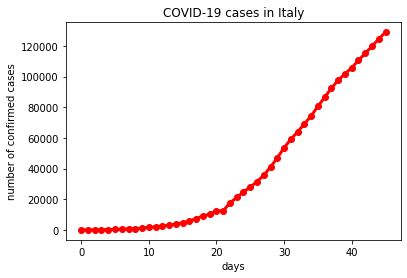

In [10]:
plt.plot(data_italy.values,'o-',color='red', linewidth= 3)
plt.xlabel('days')
plt.ylabel('number of confirmed cases')
plt.title('COVID-19 cases in Italy')
plt.show()

## 1e Resize the figure
Note that we can plot with the calendar date using `data_italy.index`

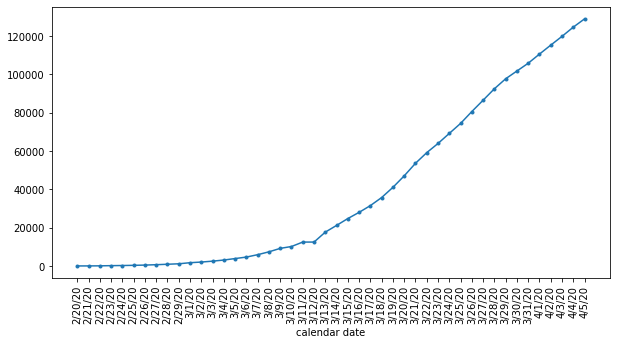

In [11]:

# resize this figure here
plt.subplots(figsize=(10,5))

plt.plot(data_italy.index,data_italy.values,'.-')
plt.xticks(rotation=90) # rotate the xticks so text is not so tight
plt.xlabel('calendar date')
plt.show()

## Part 2: Plotting US and Italy Data

We can extract the data for the US from the dataframe

In [12]:
df_us = df[df['Country/Region'] == 'US']
df_us = df_us.set_index('Country/Region', drop = True) # set pandas dataframe index to country
df_us = df_us.drop(columns=['Lat','Long','Province/State'])

data_us = df_us.loc['US','2/28/20':'4/5/20']

## 2a: Plot Italy and US data in two axes

Use subplots and assign separate colors to each country. Set the same limits on the y-axis for both subplots

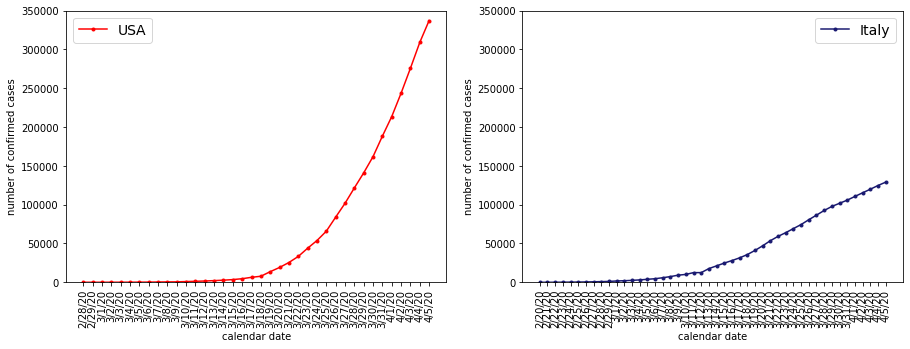

In [13]:
fig,ax = plt.subplots(1,2,figsize=(15,5)) # or whatever dimensions you like
ax[0].plot(data_us.index,data_us.values,'.-', color='red',label='USA')
ax[1].plot(data_italy.index,data_italy.values,'.-', color='midnightblue',label='Italy')


for iax in ax:
    iax.set_xlabel('calendar date')
    iax.set_ylabel('number of confirmed cases')
    iax.set_ylim(0,350000)
    iax.legend(fontsize=14)
    iax.tick_params(axis='x',labelrotation=90)

plt.show()

## 2b: Plot Italy and US data in the same plot

Text(0.5, 0, 'calendar date')

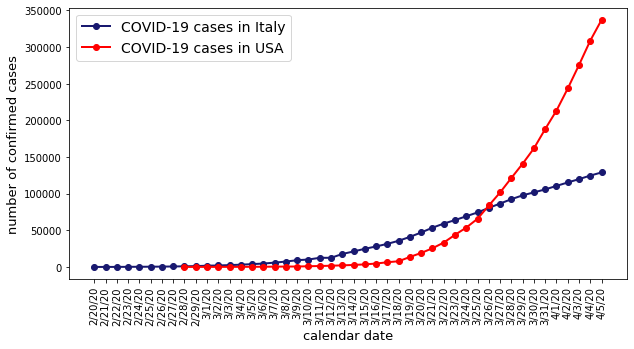

In [14]:
plt.subplots(figsize=(10,5))
y_italy = plt.plot(data_italy.index,data_italy.values,'o-', 
                   color='midnightblue',
                   label='COVID-19 cases in Italy', 
                   linewidth = 2)
y_us = plt.plot(data_us.index,data_us.values,'o-', 
                color='red',
                label='COVID-19 cases in USA',
               linewidth = 2)
plt.xticks(rotation=90)
plt.legend(fontsize=14)
plt.ylabel('number of confirmed cases',fontsize=13)
plt.xlabel('calendar date',fontsize=13)

## 2c Plot Italy and US data on log axis

Note that we only want the y-axis to be logarithmic

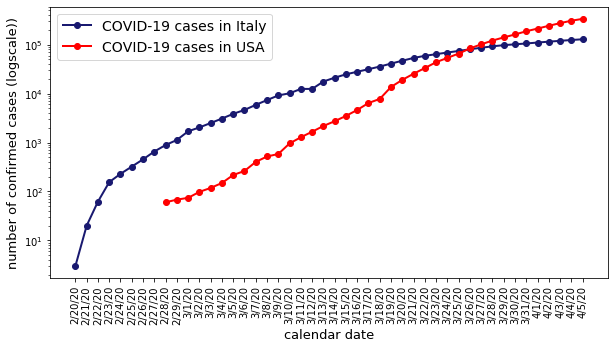

In [30]:
import numpy as np
plt.subplots(figsize=(10,5))
y_italy = plt.plot(data_italy.index,
                   data_italy.values,
                   'o-', 
                   color='midnightblue',
                   label='COVID-19 cases in Italy',
                   linewidth = 2)
y_us = plt.plot(data_us.index,
                data_us.values,
                'o-', 
                color='red',
                label='COVID-19 cases in USA',
                linewidth = 2)
plt.yscale('log')
plt.xticks(rotation=90)
plt.legend(fontsize=14)
plt.ylabel('number of confirmed cases (logscale))',fontsize=13)
plt.xlabel('calendar date',fontsize=13)
plt.show()

## 2d Make the same plot as above, but using a `for` loop

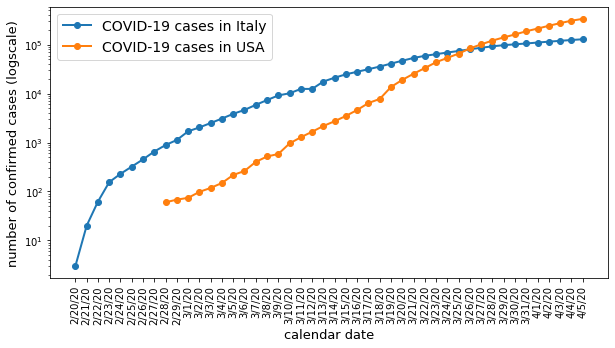

In [29]:
dict = {
    'Italy':data_italy,
    'USA':data_us
}

plt.subplots(figsize=(10,5))
for idict in range(len(dict)):
    plt.plot(dict[list(dict.keys())[idict]].index, 
             dict[list(dict.keys())[idict]].values,
             'o-',
             label='COVID-19 cases in {}'.format(list(dict.keys())[idict]), 
             linewidth = 2)

plt.yscale('log')
plt.xticks(rotation=90)
plt.legend(fontsize=14)
plt.ylabel('number of confirmed cases (logscale)',fontsize=13)
plt.xlabel('calendar date',fontsize=13)
plt.show()

## Part 3 Plot Data for 5 countries

Use a for loop, and include x/y labels and a legend. Also save your figure as a jpg and share with friends. You are now a Python datascientist

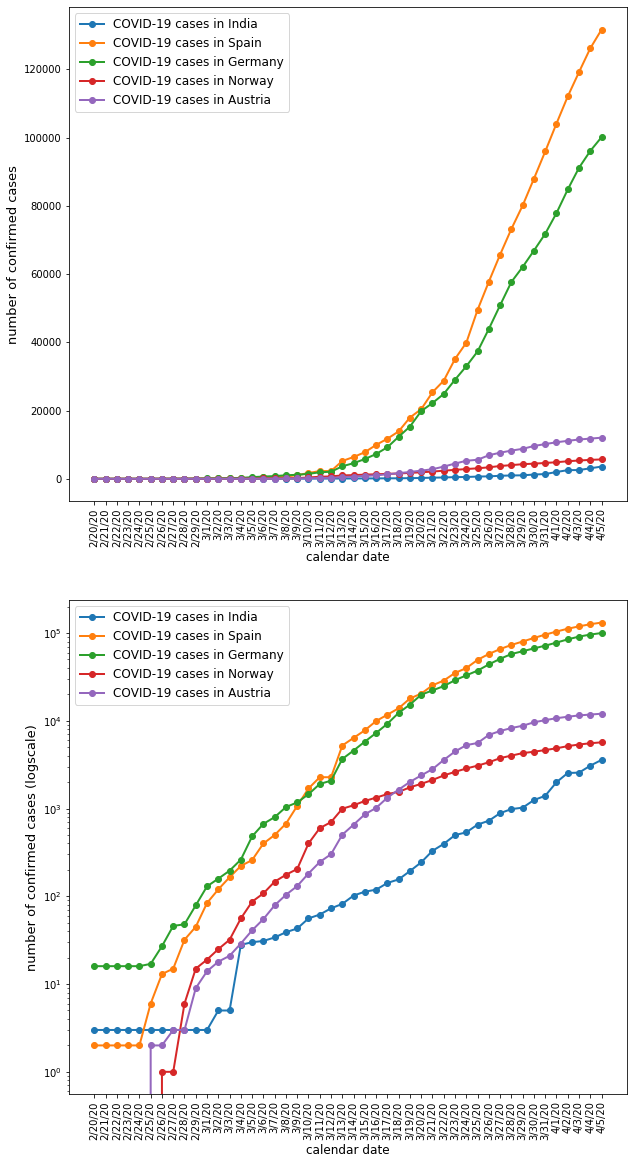

In [31]:
def plotcoronadata(countries,dates,csvfile):
    # a function that takes in :
    # 1. a list of countries
    # 2. start and end dates for analysis
    # 3. coronavirus data from a csv file
    # and returns a figure with 2 subplots: 
    # 1. number of cases vs. calendar dates 
    # 2. log(number of cases) vs. calendar dates
    
    
    import pandas as pd
    import matplotlib.pyplot as plt 
    import numpy as np 
    
    df = pd.read_csv(csvfile)
    
    dict_countries = {} # create a dictionary with data for all countries
    for iCountries in range(len(countries)):
        data = df[df['Country/Region'] == countries[iCountries]]
        data = data.set_index('Country/Region', drop = True)
        data = data.drop(columns=['Lat','Long','Province/State'])
        data = data.loc[countries[iCountries],dates[0]:dates[1]]
        dict_countries[countries[iCountries]]= data

    fig,ax = plt.subplots(2,1,figsize=(10,20)) 
    # create 1 figure with 2 subplots: 1)normal scale, 2)log scale
    
    for idict in range(len(dict_countries)):
        
        # normal scale
        ax[0].plot(dict_countries[list(dict_countries.keys())[idict]].index, 
                 dict_countries[list(dict_countries.keys())[idict]].values,
                 'o-',label='COVID-19 cases in {}'.format(list(dict_countries.keys())[idict]), 
                   linewidth = 2)
        ax[0].set_ylabel('number of confirmed cases',fontsize=13)
        
        # log scale      
        ax[1].plot(dict_countries[list(dict_countries.keys())[idict]].index, 
                 dict_countries[list(dict_countries.keys())[idict]].values,
                 'o-',label='COVID-19 cases in {}'.format(list(dict_countries.keys())[idict]), 
                   linewidth = 2)
        ax[1].set_ylabel('number of confirmed cases (logscale)',fontsize=13)
        plt.yscale('log')
    

    for iax in ax:
        iax.tick_params(axis='x',labelrotation=90)
        iax.legend(fontsize=12)
        iax.set_xlabel('calendar date',fontsize=12)
    plt.show()
    return fig

countries = ['India', 'Spain', 'Germany', 'Norway', 'Austria']
dates = ['2/20/20','4/5/20']
csvfile = 'time_series_covid19_confirmed_global.csv'
figure = plotcoronadata(countries,dates,csvfile)
figure.savefig('myfirstplot.jpg')

## Bonus: Seaborn

Plot whatever you like using seaborn

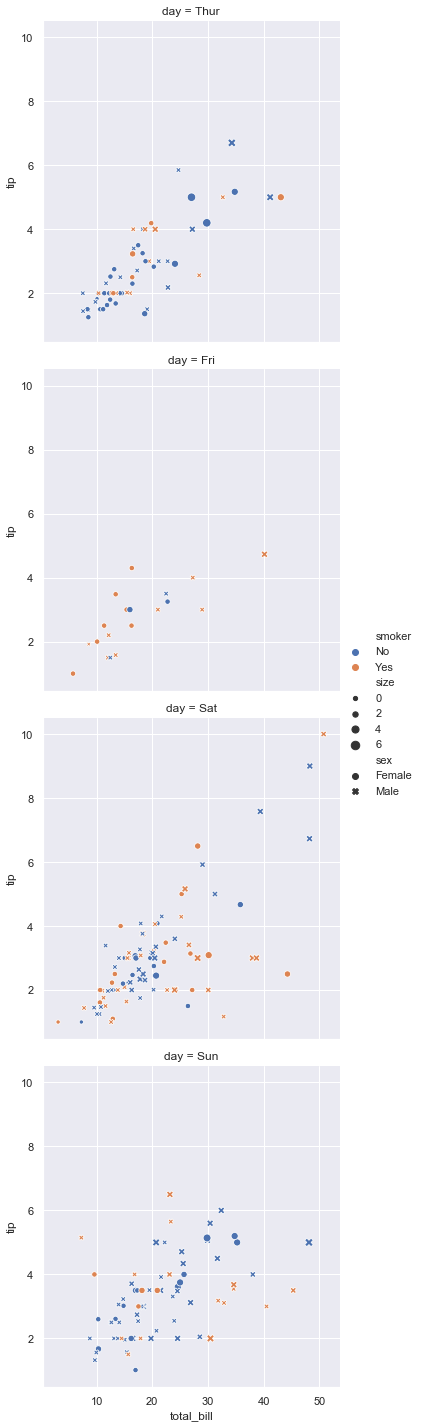

In [26]:
sns.set()
tips = sns.load_dataset("tips")
sns.relplot(x="total_bill", y="tip", row="day",
            hue="smoker", style="sex", size="size",
            data=tips)
plt.show()